#Downloading Dataset from Kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arhamrumi/amazon-product-reviews")

print("Path to dataset files:", path)

100%|██████████| 115M/115M [00:03<00:00, 35.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arhamrumi/amazon-product-reviews/versions/1


#Loading the Dataset Reviews.csv

In [ ]:
import pandas as pd
df = pd.read_csv("/root/.cache/kagglehub/datasets/arhamrumi/amazon-product-reviews/versions/1/Reviews.csv")

#Exploring the Dataset

In [ ]:
print("Columns List:\n",df.columns,"\n")

print("Data Types:\n",df.dtypes,"\n")


Columns List:
 Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object') 

Data Types:
 Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object 



In [ ]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


#Identifying the columns where the values are null

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

,0
ProfileName,26
Summary,27


fortunately such null values  not really affects the Sentiment Classification

#First Lets check the Catagorical data of **Score** Feature

In [ ]:
print(df['Score'].value_counts())


Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64


#Let's Drop the 3 Score for binary sentiment classification

In [ ]:
df = df[df['Score'] != 3]
print("Category 3 removed...")

Category 3 removed...


# Step 2: Create sentiment labels
 *1 for Positive (Score > 3), 0 for Negative (Score < 3)*

In [ ]:
# Step 1: Convert to binary labels
df['label'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

# Step 2: Keep only 'Text' and 'label' columns
df = df[['Text', 'label']]

# Step 3: Preview
print(df.head())



                                                Text  label
0  I have bought several of the Vitality canned d...      1
1  Product arrived labeled as Jumbo Salted Peanut...      0
2  This is a confection that has been around a fe...      1
3  If you are looking for the secret ingredient i...      0
4  Great taffy at a great price.  There was a wid...      1


In [ ]:
print(df['label'].value_counts())

label
1    443777
0     82037
Name: count, dtype: int64


As we see we successfully eliminated the Neutral responses from the dataset

#Now we will clean the Text for training Logistic Regression Model

In [ ]:
!pip install nltk

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Preprocessing the corpus using
* NLTK
* Regular Expressions


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()                                  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)                  # Remove punctuation
    text = re.sub(r'\d+', '', text)                      # Remove digits
    tokens = word_tokenize(text)                         # Tokenize
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]  # Remove stopwords and lemmatize
    return " ".join(tokens)


**Preprocessing logic:**
* First the text is lowered to small alphabets
* then the punctuation is removed from the corpus for reducing biasness in infrence
* the digits aren't really important in binary classification and they may add irrelevent context
* the text is then tokenized (single indivisual words)
* these tokenized words are then checked for containing stop words to remove them
* the cleaned tokens are then lemmatized by reducing them to there base words
atlast each token in indivisual sentence is then joined together

In [ ]:
df['clean_text'] = df['Text'].apply(clean_text)


In [ ]:
df['clean_text'].head(10)

,clean_text
0,bought several vitality canned dog food produc...
1,product arrived labeled jumbo salted peanutsth...
2,confection around century light pillowy citrus...
3,looking secret ingredient robitussin believe f...
4,great taffy great price wide assortment yummy ...
5,got wild hair taffy ordered five pound bag taf...
6,saltwater taffy great flavor soft chewy candy ...
7,taffy good soft chewy flavor amazing would def...
8,right im mostly sprouting cat eat grass love r...
9,healthy dog food good digestion also good smal...


**Term Frecuency/ Inverse Document Frequency (TF-IDF)**
* For feature extraction from the corpus(Efficient Vector encoding)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['clean_text'])


**Using the Labels For Binary Sentiments (0,1)**

In [ ]:
y = df['label']  # 1 for positive, 0 for negative


In [ ]:
print(X[5])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 36 stored elements and shape (1, 203766)>
  Coords	Values
  (0, 147980)	0.08397316624124321
  (0, 185930)	0.08612733764826379
  (0, 73230)	0.08728030198389926
  (0, 153307)	0.15453436681598345
  (0, 14359)	0.15577983162213782
  (0, 128416)	0.09298006286717037
  (0, 63777)	0.05931759397937721
  (0, 176844)	0.5734135758822607
  (0, 198688)	0.14796838370145785
  (0, 76705)	0.13710856620107265
  (0, 63325)	0.1285867594632839
  (0, 139684)	0.11859110590903948
  (0, 11696)	0.07834372284924968
  (0, 55837)	0.15187732496635056
  (0, 109424)	0.08726526868125492
  (0, 195816)	0.1797088407669606
  (0, 112044)	0.21173808944957012
  (0, 134380)	0.1515761430472707
  (0, 74006)	0.15580543020319212
  (0, 57132)	0.1169838415035714
  (0, 35963)	0.13193430312639692
  (0, 16774)	0.08658265359649601
  (0, 117991)	0.07080713818539165
  (0, 148275)	0.3057285186751798
  (0, 103958)	0.2859150500832607
  (0, 136116)	0.10933230938429088
  (0, 132619)	

#(Spliting Train and Test Data for model evaluation)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Training Logistic Regression Algortihm

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

#Evaluation of Model's Accuracy using  
* Accuracy Score
* Confusion Matrix
* Classification Report
------------------------------
#output
* precision:
* recall:   0.86      
* f1-score: 0.69
* support:  0.77


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9343305154854844
[[11336  5043]
 [ 1863 86921]]
              precision    recall  f1-score   support

           0       0.86      0.69      0.77     16379
           1       0.95      0.98      0.96     88784

    accuracy                           0.93    105163
   macro avg       0.90      0.84      0.86    105163
weighted avg       0.93      0.93      0.93    105163



#Visualization Report

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

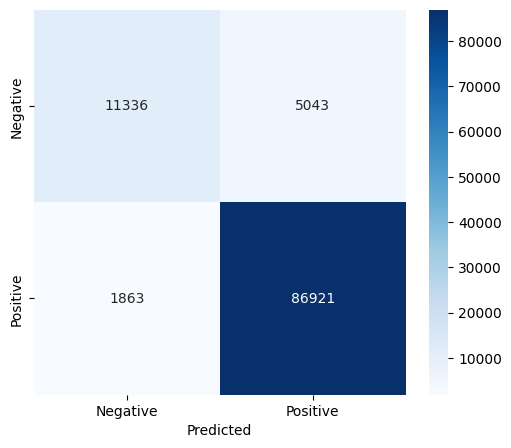

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matri
# Predict again if needed
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel


#Using TF-IDF to check the most contributing Features

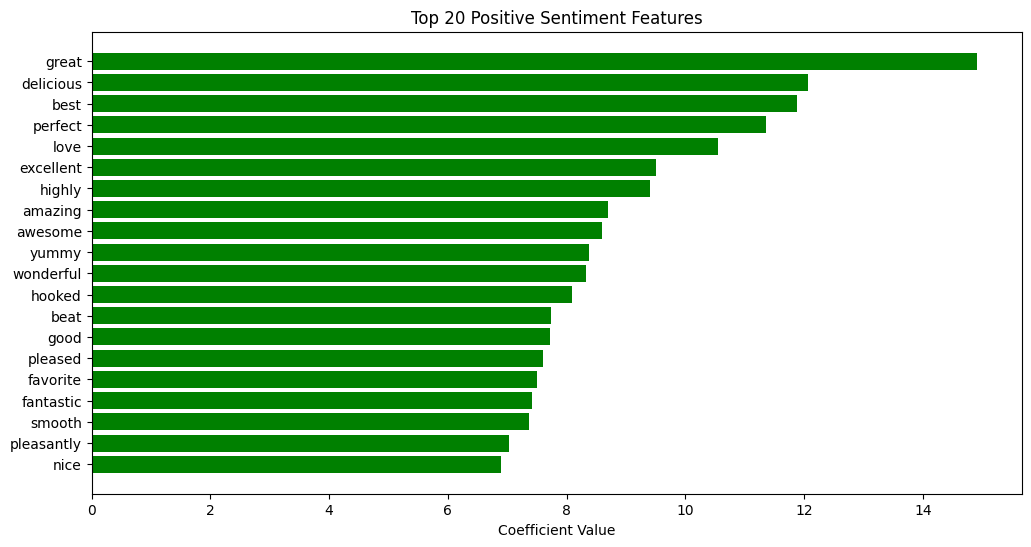

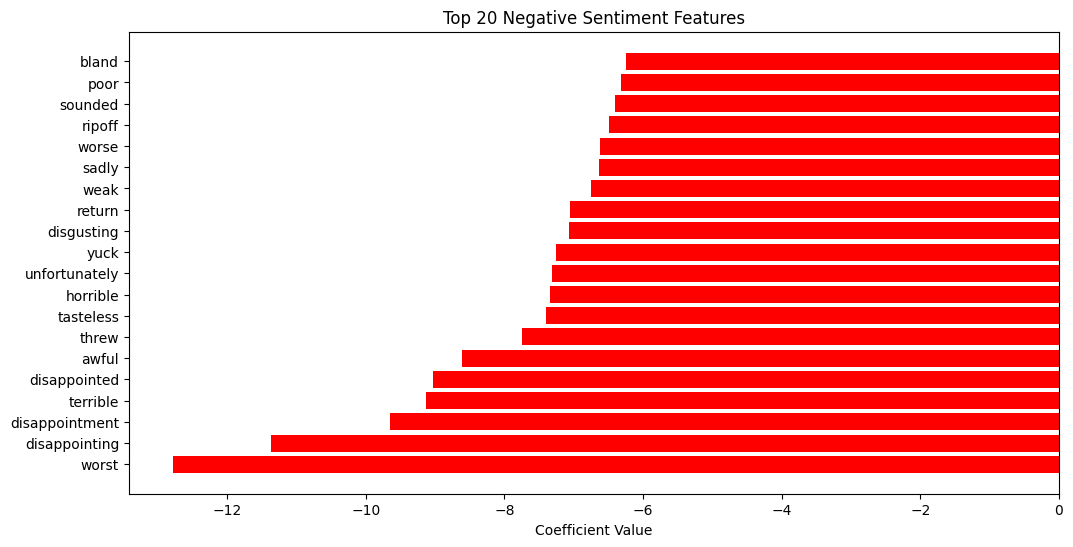

In [ ]:
import numpy as np

# Get feature names
feature_names = tfidf.get_feature_names_out()
coefs = model.coef_[0]

# Top positive features
top_positive = np.argsort(coefs)[-20:]
# Top negative features
top_negative = np.argsort(coefs)[:20]

plt.figure(figsize=(12, 6))
plt.barh(range(20), coefs[top_positive], color='green')
plt.yticks(range(20), [feature_names[i] for i in top_positive])
plt.title("Top 20 Positive Sentiment Features")
plt.xlabel("Coefficient Value")
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(range(20), coefs[top_negative], color='red')
plt.yticks(range(20), [feature_names[i] for i in top_negative])
plt.title("Top 20 Negative Sentiment Features")
plt.xlabel("Coefficient Value")
plt.show()

In [ ]:
!pip install wordcloud


#Using WordCloud To visualize the big picture of contributing features

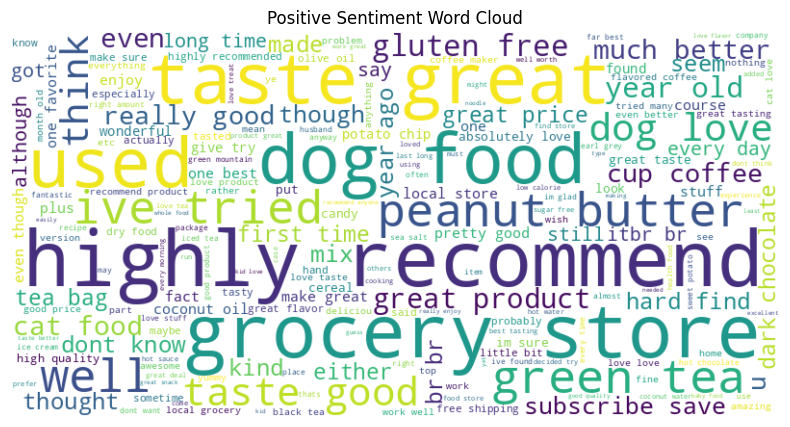

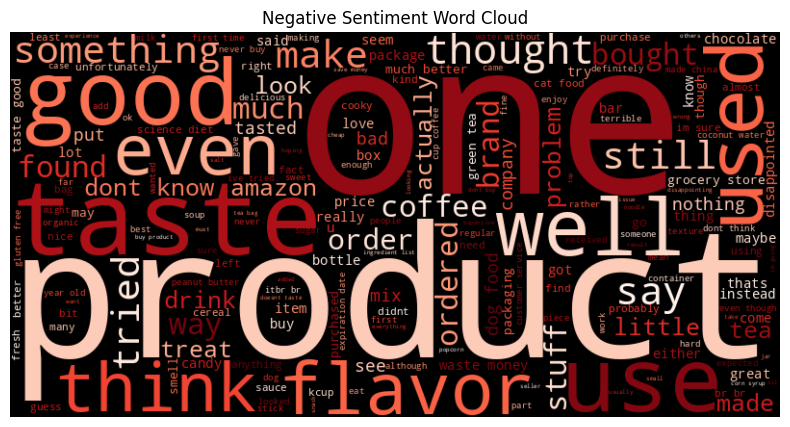

In [ ]:
from wordcloud import WordCloud

# Separate clean text by class
positive_text = " ".join(df[df['label'] == 1]['clean_text'])
negative_text = " ".join(df[df['label'] == 0]['clean_text'])

# Positive word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Word Cloud")
plt.show()

# Negative word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Word Cloud")
plt.show()
